In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col="Id")

In [4]:
training_data.shape

(1460, 80)

In [5]:
testing_data.shape

(1459, 79)

In [6]:
all_data = pd.concat((training_data, testing_data)).reset_index(drop=True)
all_data.shape

(2919, 80)

In [7]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [8]:
def ConvertStringToInt(df):
  columns_to_encode = list(df.select_dtypes(include=['category','object'])) #gets all columns with non-numeric values
  le = LabelEncoder()
  for feature in columns_to_encode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding '+feature)
  return df

In [9]:
all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
columns_has_null = all_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

SalePrice       1459
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
Functional         2
BsmtFinSF1         1
SaleType           1
TotalBsmtSF        1
Electrical         1
KitchenQual        1
BsmtFinSF2         1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
BsmtUnfSF          1
dtype: int64

In [10]:
all_data = ConvertStringToInt(all_data)
all_data = all_data.replace({np.NaN:0})

# Forest regression starts here

In [11]:
training_data = all_data.iloc[:1460, :]
testing_data = all_data.iloc[-1459:, :]
training_data.shape, testing_data.shape

((1460, 75), (1459, 75))

In [12]:
X = all_data.iloc[:, :-1]
y = all_data.iloc[:, -1:]
X_train, X_test = training_data.iloc[:,:-1], testing_data.iloc[:,:-1]
#X_test
y_train, y_test = training_data.iloc[:,-1:], testing_data.iloc[:,-1:]
#y_test.drop(['SalePrice'], axis=1, inplace=True)
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1461,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
1462,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
1463,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
1464,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
2915,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
2916,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
2917,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4


In [16]:
OLS_model = OLS(y_train, X_train).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              773.4
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:40:37   Log-Likelihood:                         -17162.
No. Observations:                1460   AIC:                                  3.447e+04
Df Residuals:                    1388   BIC:                                  3.485e+04
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -121.5293     45.119     -2.694      0.007    -210.037     -33.021
MSZoning       -983.0863   1507.732     -0.652      0.514   -3940.765    1974.593
LotFrontage     -22.9849     27.726     -0.829      0.407     -77.374      31.404
LotArea           0.3769      0.105      3.584      0.000       0.171       0.583
Street         3.324e+04   1.39e+04      2.390      0.017    5953.841    6.05e+04
LotShape       -825.8050    676.607     -1.221      0.222   -2153.087     501.477
LandContour    3656.7440   1340.968      2.727      0.006    1026.202    6287.286
Utilities     -5.403e+04   3.31e+04     -1.632      0.103   -1.19e+05    1.09e+04
LotConfig       200.2895    540.543      0.371      0.711    -860.080    1260.659
LandSlope      5722.3414   3819.404      1.498      0.134   -1770.086    1.32e+04
Neighborhood    374.0813    154.377      2.423      0.016      71.244     676.919
Condition1     -522.6033   1010.687     -0.517      0.605   -2505.241    1460.035
Condition2    -8697.5294   3338.915     -2.605      0.009   -1.52e+04   -2147.666
BldgType      -1619.7460   1475.820     -1.098      0.273   -4514.824    1275.332
HouseStyle    -1416.2164    650.133     -2.178      0.030   -2691.566    -140.867
OverallQual    1.138e+04   1179.305      9.647      0.000    9063.409    1.37e+04
OverallCond    4859.5620   1036.007      4.691      0.000    2827.253    6891.871
YearBuilt       208.5715     72.837      2.864      0.004      65.688     351.455
YearRemodAdd     14.3021     66.262      0.216      0.829    -115.682     144.286
RoofStyle      2261.5964   1119.158      2.021      0.043      66.173    4457.020
RoofMatl       4618.4665   1496.931      3.085      0.002    1681.975    7554.958
Exterior1st    -925.8526    518.718     -1.785      0.074   -1943.409      91.704
Exterior2nd     263.4898    468.954      0.562      0.574    -656.444    1183.424
MasVnrType     4294.6237   1524.295      2.817      0.005    1304.454    7284.794
MasVnrArea       30.2362      6.092      4.963      0.000      18.286      42.186
ExterQual     -8775.2698   1943.543     -4.515      0.000   -1.26e+04   -4962.671
ExterCond       551.9698   1251.241      0.441      0.659   -1902.558    3006.498
Foundation     1545.3413   1655.032      0.934      0.351   -1701.293    4791.976
BsmtQual      -7998.8444   1419.413     -5.635      0.000   -1.08e+04   -5214.418
BsmtCond       2443.9928   1341.225      1.822      0.069    -187.054    5075.040
BsmtExposure  -3566.8176    883.274     -4.038      0.000   -5299.514   -1834.122
BsmtFinType1   -764.8032    620.546     -1.232      0.218   -1982.113     452.507
BsmtFinSF1        2.5920      2.865      0.905      0.366      -3.028       8.212
BsmtFinType2   1163.2674   1355.

# Random Forest Model Prediction for 50% of missing housing data

In [17]:
OLS_y_prediction = OLS_model.predict(X_test)

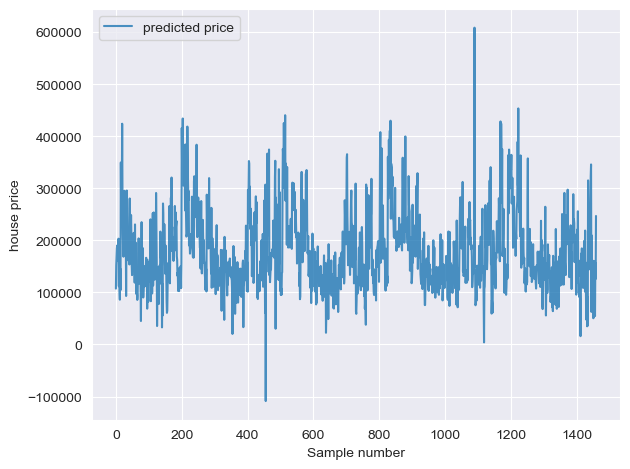

In [18]:
fig,ax = plt.subplots()
plt.plot(OLS_y_prediction.to_numpy(), alpha = 0.8,label=r"predicted price")
#plt.plot(y_test.to_nmpy(), alpha = 0.8,label=r"observed price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
#plt.xlim(0,100)
#plt.ylim(0.5,6)

plt.tight_layout()
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

# Reverse OLS 50:50 split to verify that the prediction is correct

In [24]:
OLS_model_reverse = OLS(OLS_y_prediction, X_test).fit()
OLS_model_reverse_prediction = OLS_model.predict(X_train)
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              773.4
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:44:56   Log-Likelihood:                         -17162.
No. Observations:                1460   AIC:                                  3.447e+04
Df Residuals:                    1388   BIC:                                  3.485e+04
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -121.5293     45.119     -2.694      0.007    -210.037     -33.021
MSZoning       -983.0863   1507.732     -0.652      0.514   -3940.765    1974.593
LotFrontage     -22.9849     27.726     -0.829      0.407     -77.374      31.404
LotArea           0.3769      0.105      3.584      0.000       0.171       0.583
Street         3.324e+04   1.39e+04      2.390      0.017    5953.841    6.05e+04
LotShape       -825.8050    676.607     -1.221      0.222   -2153.087     501.477
LandContour    3656.7440   1340.968      2.727      0.006    1026.202    6287.286
Utilities     -5.403e+04   3.31e+04     -1.632      0.103   -1.19e+05    1.09e+04
LotConfig       200.2895    540.543      0.371      0.711    -860.080    1260.659
LandSlope      5722.3414   3819.404      1.498      0.134   -1770.086    1.32e+04
Neighborhood    374.0813    154.377      2.423      0.016      71.244     676.919
Condition1     -522.6033   1010.687     -0.517      0.605   -2505.241    1460.035
Condition2    -8697.5294   3338.915     -2.605      0.009   -1.52e+04   -2147.666
BldgType      -1619.7460   1475.820     -1.098      0.273   -4514.824    1275.332
HouseStyle    -1416.2164    650.133     -2.178      0.030   -2691.566    -140.867
OverallQual    1.138e+04   1179.305      9.647      0.000    9063.409    1.37e+04
OverallCond    4859.5620   1036.007      4.691      0.000    2827.253    6891.871
YearBuilt       208.5715     72.837      2.864      0.004      65.688     351.455
YearRemodAdd     14.3021     66.262      0.216      0.829    -115.682     144.286
RoofStyle      2261.5964   1119.158      2.021      0.043      66.173    4457.020
RoofMatl       4618.4665   1496.931      3.085      0.002    1681.975    7554.958
Exterior1st    -925.8526    518.718     -1.785      0.074   -1943.409      91.704
Exterior2nd     263.4898    468.954      0.562      0.574    -656.444    1183.424
MasVnrType     4294.6237   1524.295      2.817      0.005    1304.454    7284.794
MasVnrArea       30.2362      6.092      4.963      0.000      18.286      42.186
ExterQual     -8775.2698   1943.543     -4.515      0.000   -1.26e+04   -4962.671
ExterCond       551.9698   1251.241      0.441      0.659   -1902.558    3006.498
Foundation     1545.3413   1655.032      0.934      0.351   -1701.293    4791.976
BsmtQual      -7998.8444   1419.413     -5.635      0.000   -1.08e+04   -5214.418
BsmtCond       2443.9928   1341.225      1.822      0.069    -187.054    5075.040
BsmtExposure  -3566.8176    883.274     -4.038      0.000   -5299.514   -1834.122
BsmtFinType1   -764.8032    620.546     -1.232      0.218   -1982.113     452.507
BsmtFinSF1        2.5920      2.865      0.905      0.366      -3.028       8.212
BsmtFinType2   1163.2674   1355.

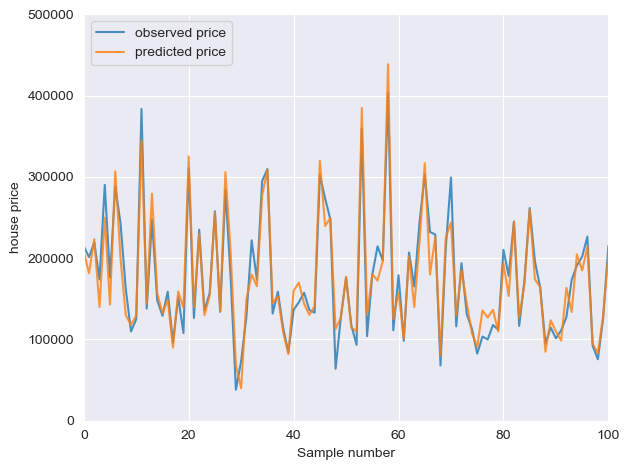

In [29]:
fig,ax = plt.subplots()
plt.plot(OLS_model_reverse_prediction.to_numpy(), alpha = 0.8,label=r"observed price")
plt.plot(y_train.to_numpy(), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlim(0,100)
plt.ylim(0,500000)
plt.tight_layout()
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

## Correlation Graph for OLS after prediction

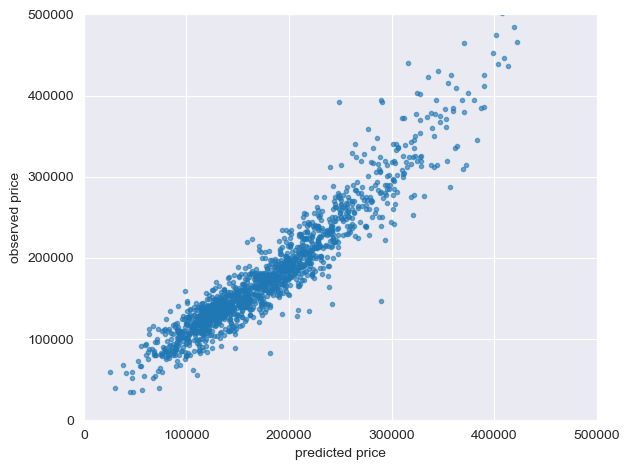

In [32]:
fig,ax = plt.subplots()
plt.plot(OLS_model_reverse_prediction.to_numpy(), y_train.to_numpy(), ".", alpha=0.6)

plt.xlabel(r"predicted price")
plt.ylabel(r"observed price")

plt.xlim(0,500000)
plt.ylim(0,500000)

plt.tight_layout()
#plt.savefig("predicted_house_price_regression_correlation.png", dpi=600)
plt.show()